In [6]:
import os
os.environ["USE_TF"] = "0"


In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
!pip install openpyxl

In [9]:
from google.colab import files
uploaded = files.upload()

Saving drugsCom_raw.xlsx to drugsCom_raw (1).xlsx


In [10]:
data = pd.read_excel('drugsCom_raw.xlsx')

In [11]:
data.head(5)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


In [12]:
# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in data.columns:
    data.drop(columns='Unnamed: 0', inplace=True)

# Filter rows where the condition is one of the target conditions
target_conditions = ['Depression', 'High Blood Pressure', 'Diabetes, Type 2']
data = data[data['condition'].isin(target_conditions)]

# Reset the index to start from 0
data.reset_index(drop=True, inplace=True)

# Display the first 5 rows of the filtered data
data.head()

,drugName,condition,review,rating,date,usefulCount
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,2017-03-09,54
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,2011-05-07,3
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,2016-04-27,3
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,2017-10-24,24
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,2013-06-20,166


In [13]:
# Display 5 random sample
data.sample(5)

,drugName,condition,review,rating,date,usefulCount
309,Jardiance,"Diabetes, Type 2","""Been on Jardiance 10mg 3 months and have lost...",7,2016-12-24,24
12232,Insulin glargine,"Diabetes, Type 2","""The medicine works great. Aside from an occas...",8,2008-05-30,6
9618,Duloxetine,Depression,"""I was previously on Lexapro, but it made me t...",9,2014-02-14,88
13140,Diovan,High Blood Pressure,"""I was recently switched to a BP control regim...",10,2016-03-04,41
10428,Lexapro,Depression,"""I started this medication at a very low dose ...",1,2014-08-05,79


In [14]:
# Size of rows and columns
data.shape

(13944, 6)

In [15]:
# Get information about columns types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13944 entries, 0 to 13943
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   drugName     13944 non-null  object        
 1   condition    13944 non-null  object        
 2   review       13944 non-null  object        
 3   rating       13944 non-null  int64         
 4   date         13944 non-null  datetime64[ns]
 5   usefulCount  13944 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 653.8+ KB


In [16]:
# Get basic statistical details of numerical columns
data.describe().T

,count,mean,min,25%,50%,75%,max,std
rating,13944.0,6.862952,1.0,4.0,8.0,10.0,10.0,3.207061
date,13944,2013-12-16 11:58:33.253012224,2008-02-25 00:00:00,2011-08-24 00:00:00,2014-08-25 00:00:00,2016-05-31 00:00:00,2017-12-12 00:00:00,NaN
usefulCount,13944.0,45.73788,0.0,16.0,31.0,59.0,1291.0,51.782627


In [17]:
# Basic statistics summary of Object features
data.describe(include = 'object').T

,count,unique,top,freq
drugName,13944,334,Bupropion,549
condition,13944,3,Depression,9069
review,13944,9802,"""Good""",3


In [18]:
# Get features names
data.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'], dtype='object')

In [19]:
# Filtering categorical columns
data.select_dtypes(include='object').columns

Index(['drugName', 'condition', 'review'], dtype='object')

In [20]:
# Checking duplicate values
data.duplicated().sum()

np.int64(0)

In [21]:
# Count of each condition
data['condition'].value_counts()

,count
condition,
Depression,9069
"Diabetes, Type 2",2554
High Blood Pressure,2321


In [22]:
# Checking missing values in filtered data
missing = data.isnull().sum()
print("Missing values in the filtered data:")
print(missing)

Missing values in the filtered data:
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64


In [23]:
# Access the third review (index 2) in the 'review' column
data.loc[2, 'review']

'"my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better"'

In [24]:
# Text cleaning
import re
import string
import nltk

# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [25]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(raw_review):
    review_text = BeautifulSoup(raw_review , 'html.parser').get_text() # Delete HTML
    letters_only = re.sub('[^a-zA-Z]',' ',review_text) # Make a space
    words = letters_only.lower().split()               # lower letters
    meaningful_words = [w for w in words if not w in stop] # Stopwords
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words] # Lemmitization
    return( ' '.join(lemmitize_words)) # Space join words


In [26]:
# Cleaned text
data['clean_review'] = data['review'].apply(preprocess_text)
data['clean_review']

,clean_review
0,taken anti depressant year improvement mostly ...
1,week zoloft anxiety mood swing take mg morning...
2,gp started venlafaxine yesterday help depressi...
3,hey guy month since last post wanted give mont...
4,medicine saved life wit end anti depressant re...
...,...
13939,fourth blood pressure pill feel like partly wo...
13940,bystolic foot arm numb blood sugar became seve...
13941,got diagnosed type doctor prescribed invokana ...
13942,third med tried anxiety mild depression week h...


/tmp/ipython-input-27-2885088899.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='coolwarm')


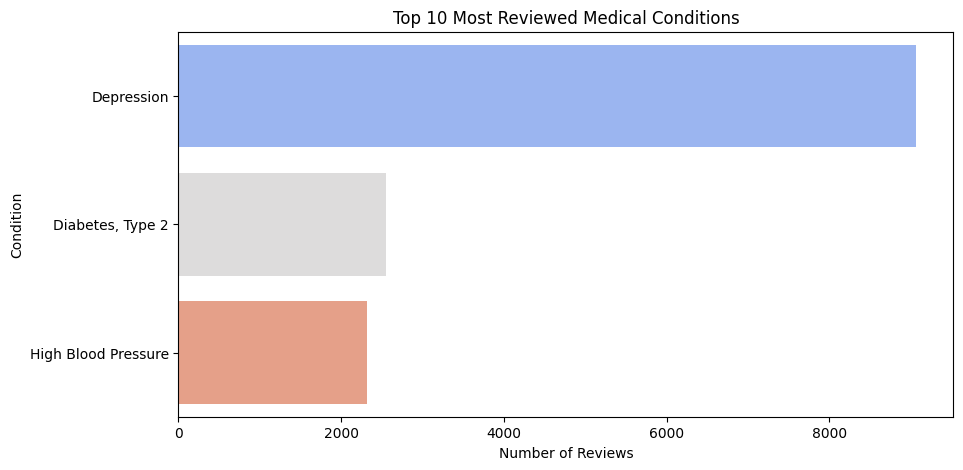

In [27]:
# **Univariate Analysis**

# Most Common Medical Conditions
top_conditions = data['condition'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='coolwarm')
plt.title('Top 10 Most Reviewed Medical Conditions')
plt.xlabel('Number of Reviews')
plt.ylabel('Condition')
plt.show()

/tmp/ipython-input-28-1034613805.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=data, palette='viridis')


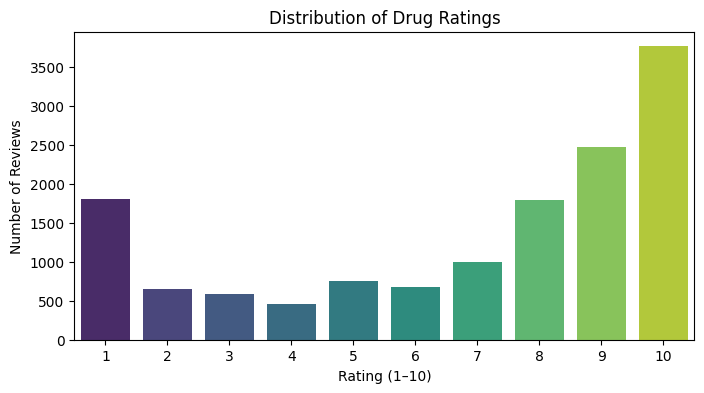

In [28]:
# Distribution of Drug Ratings
plt.figure(figsize=(8, 4))
sns.countplot(x='rating', data=data, palette='viridis')
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating (1–10)')
plt.ylabel('Number of Reviews')
plt.show()

/tmp/ipython-input-29-1333921635.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drugs.values, y=top_drugs.index, palette='cubehelix')


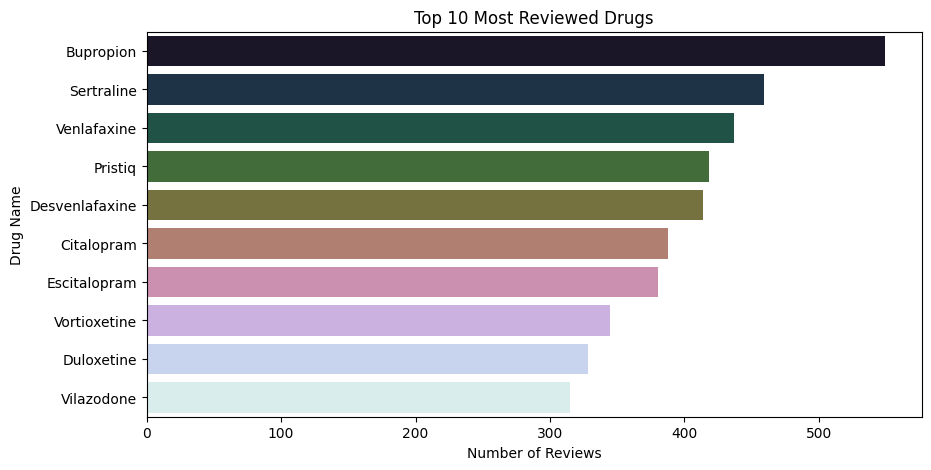

In [29]:
# Most Reviewed Drugs
top_drugs = data['drugName'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_drugs.values, y=top_drugs.index, palette='cubehelix')
plt.title('Top 10 Most Reviewed Drugs')
plt.xlabel('Number of Reviews')
plt.ylabel('Drug Name')
plt.show()

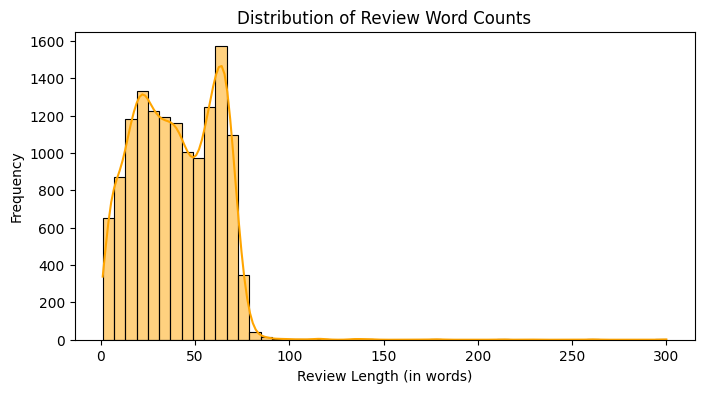

In [30]:
# Distribution of Review Lengths
data['review_length'] = data['clean_review'].apply(lambda x: len(x.split()))

# Plot the distribution
plt.figure(figsize=(8, 4))
sns.histplot(data['review_length'], bins=50, kde=True, color='orange')
plt.title('Distribution of Review Word Counts')
plt.xlabel('Review Length (in words)')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-31-1134290312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='Set2')


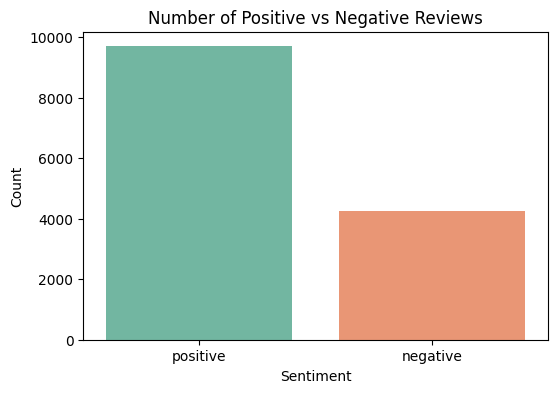

In [31]:
# Sentiment Distribution
data['Sentiment'] = data['rating'].apply(lambda x: 'positive' if x >= 6 else 'negative')

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=data, palette='Set2')
plt.title('Number of Positive vs Negative Reviews')
plt.ylabel('Count')
plt.show()

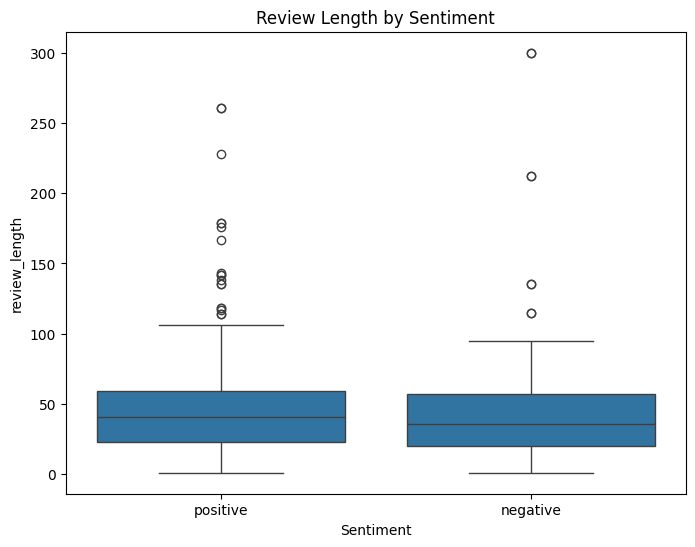

In [32]:
# Bivariate Analysis

# Review Length vs Sentiment (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='review_length', data=data)
plt.title('Review Length by Sentiment')
plt.show()

In [33]:
# Word Frequency by Rating (1–5 Stars Only)
from collections import Counter
import matplotlib.pyplot as plt

# Ensure ratings are integers and filter only valid 1–5 ratings
data = data[data['rating'].isin([1, 2, 3, 4, 5,6,7,8,9,10])]

# Create a dictionary to hold word counts for each rating
rating_word_counts = {}

for rating in range(1, 11):
    # Filter reviews for this rating
    subset = data[data['rating'] == rating]

    # Combine all cleaned reviews into one big string
    all_text = " ".join(subset['clean_review'])

    # Split into words and count frequencies
    word_freq = Counter(all_text.split())

    # Save top 10 words for this rating
    rating_word_counts[rating] = word_freq.most_common(10)

# Display word frequency results
for rating in rating_word_counts:
    print(f"\nTop words for Rating {rating}:")
    for word, count in rating_word_counts[rating]:
        print(f"{word}: {count}")



Top words for Rating 1:
day: 1062
taking: 758
week: 721
mg: 706
month: 577
medication: 569
drug: 568
effect: 559
doctor: 537
side: 511

Top words for Rating 2:
day: 383
mg: 341
week: 310
taking: 302
effect: 280
side: 237
medication: 212
month: 207
feel: 205
started: 196

Top words for Rating 3:
mg: 356
day: 348
taking: 280
effect: 277
week: 255
side: 255
started: 200
month: 197
feel: 184
depression: 182

Top words for Rating 4:
mg: 298
day: 268
taking: 218
week: 212
effect: 211
side: 206
started: 192
feel: 169
month: 167
doctor: 150

Top words for Rating 5:
mg: 454
day: 439
week: 381
effect: 376
taking: 331
side: 329
month: 267
year: 262
feel: 254
started: 250

Top words for Rating 6:
mg: 415
day: 396
effect: 331
taking: 315
week: 313
side: 309
month: 305
depression: 271
year: 259
feel: 239

Top words for Rating 7:
mg: 751
day: 581
effect: 544
side: 502
taking: 489
depression: 469
week: 465
year: 437
feel: 418
month: 396

Top words for Rating 8:
mg: 1230
effect: 1056
day: 1017
side: 9

/tmp/ipython-input-34-3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


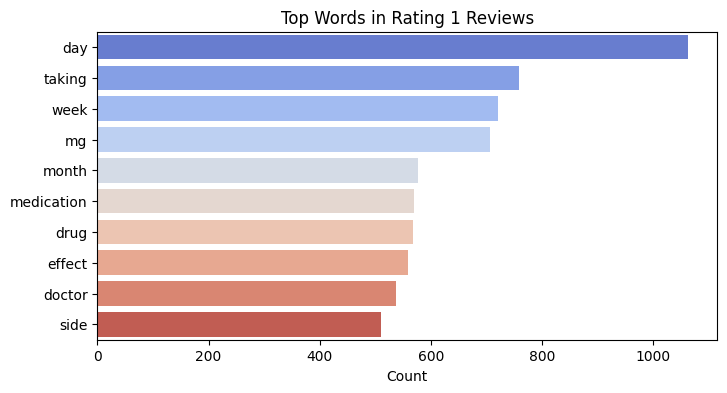

/tmp/ipython-input-34-3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


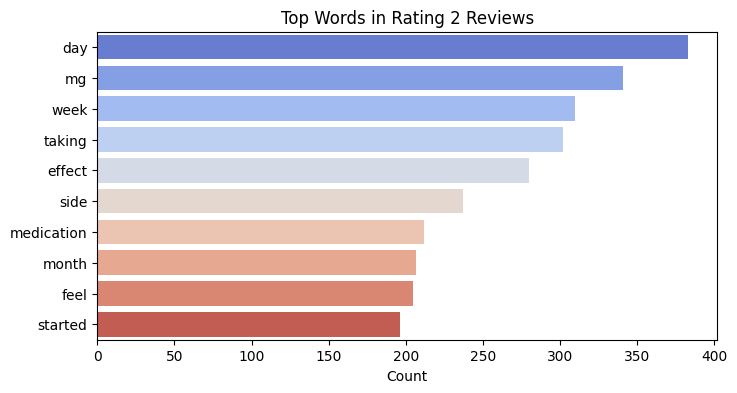

/tmp/ipython-input-34-3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


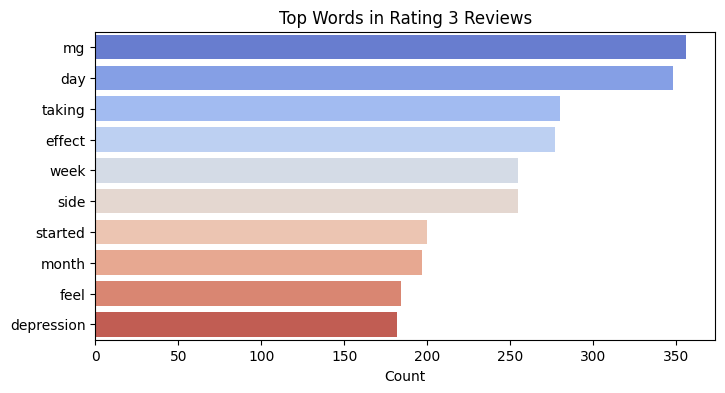

/tmp/ipython-input-34-3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


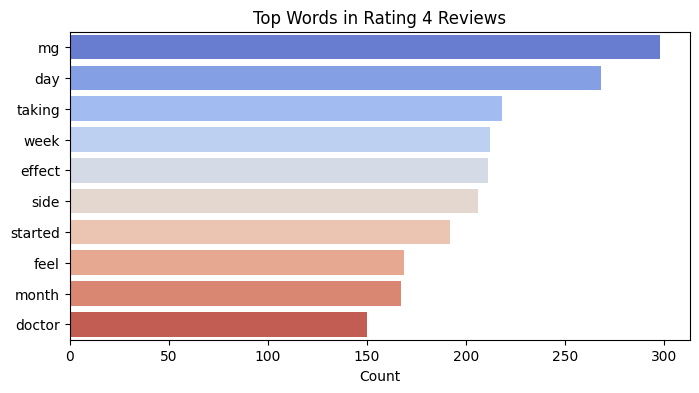

/tmp/ipython-input-34-3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


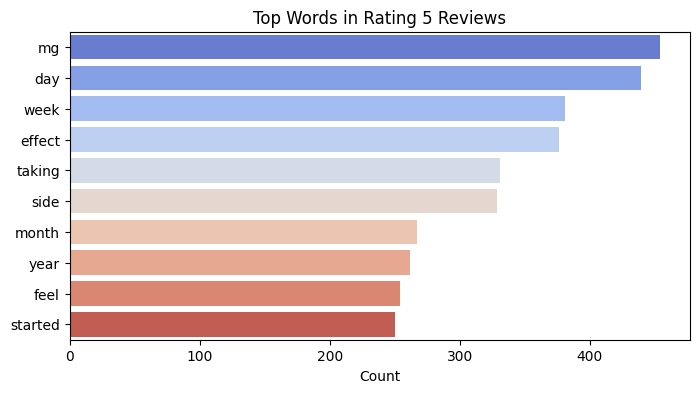

/tmp/ipython-input-34-3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


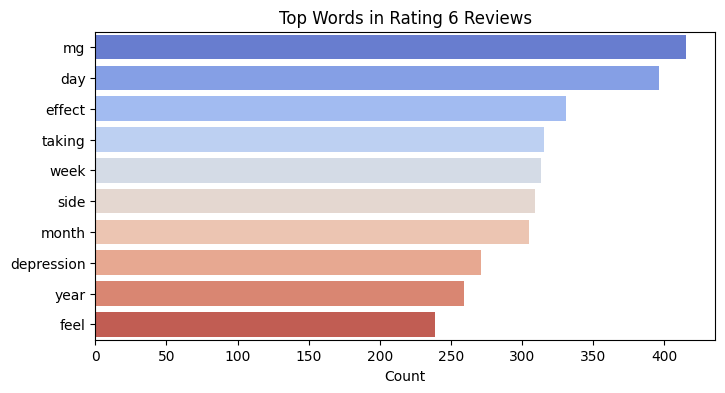

/tmp/ipython-input-34-3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


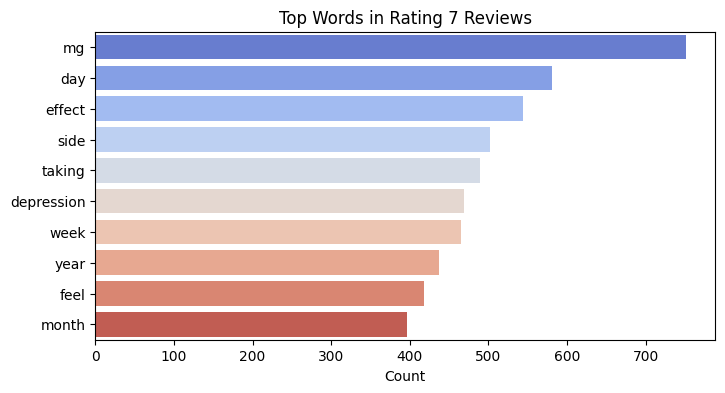

/tmp/ipython-input-34-3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


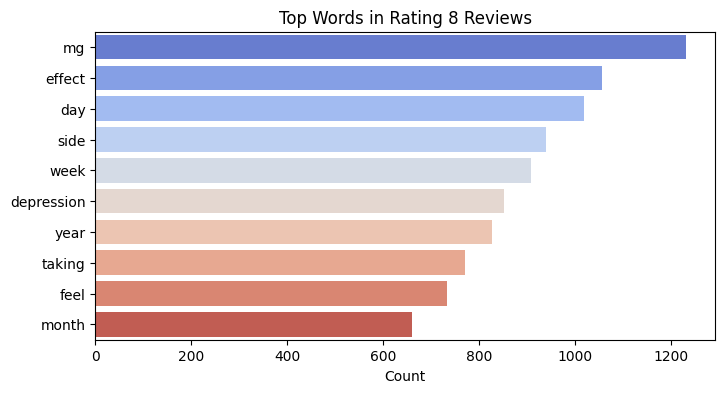

/tmp/ipython-input-34-3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


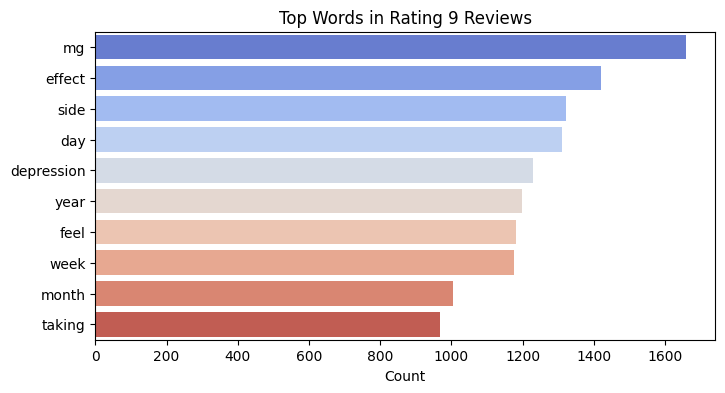

/tmp/ipython-input-34-3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


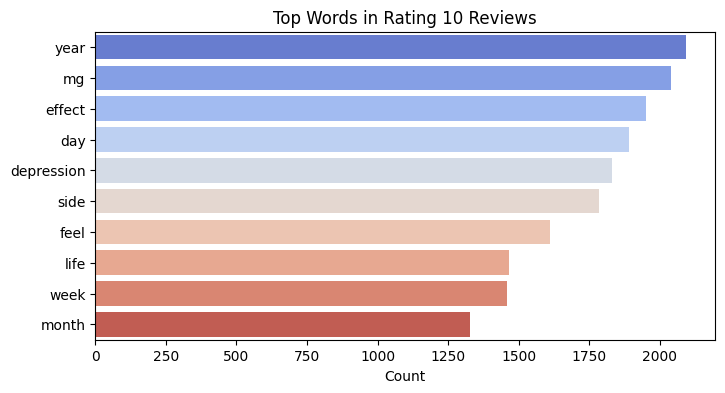

In [34]:
# Plot word frequencies
for rating, word_freq in rating_word_counts.items():
    words, counts = zip(*word_freq)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(counts), y=list(words), palette='coolwarm')
    plt.title(f'Top Words in Rating {rating} Reviews')
    plt.xlabel('Count')
    plt.show()

In [35]:
# N-Gram Analysis
from nltk.util import ngrams

def get_ngrams(texts, n):
    all_ngrams = []
    stop_words = set(stopwords.words('english'))

    for text in texts:
        text = preprocess_text(text)
        tokens = [word for word in text.split() if word not in stop_words]
        n_grams = list(ngrams(tokens, n))
        all_ngrams.extend(n_grams)

    return Counter(all_ngrams).most_common(15)

# Bigram Analysis
top_bigrams = get_ngrams(data['review'], 2)
print("Top Bigrams:", top_bigrams)

# Trigram Analysis
top_trigrams = get_ngrams(data['review'], 3)
print("Top Trigrams:", top_trigrams)

Top Bigrams: [(('side', 'effect'), 6042), (('blood', 'pressure'), 1951), (('feel', 'like'), 1038), (('blood', 'sugar'), 901), (('started', 'taking'), 898), (('depression', 'anxiety'), 791), (('mg', 'day'), 691), (('first', 'week'), 673), (('weight', 'gain'), 649), (('much', 'better'), 636), (('year', 'ago'), 567), (('panic', 'attack'), 564), (('taking', 'mg'), 545), (('felt', 'like'), 525), (('year', 'old'), 520)]
Top Trigrams: [(('high', 'blood', 'pressure'), 338), (('sexual', 'side', 'effect'), 229), (('feel', 'much', 'better'), 222), (('bad', 'side', 'effect'), 147), (('negative', 'side', 'effect'), 126), (('mg', 'per', 'day'), 110), (('mg', 'twice', 'day'), 99), (('first', 'two', 'week'), 99), (('blood', 'sugar', 'level'), 97), (('week', 'side', 'effect'), 97), (('side', 'effect', 'first'), 93), (('year', 'old', 'female'), 89), (('many', 'side', 'effect'), 89), (('experienced', 'side', 'effect'), 87), (('day', 'side', 'effect'), 87)]


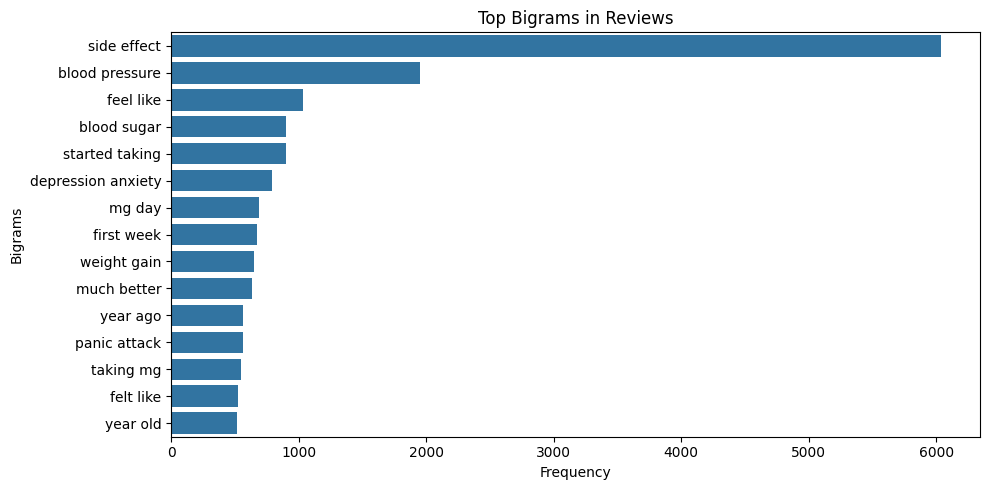

In [36]:
# Plot Top Bigrams
bigram_words = [' '.join(gram) for gram, count in top_bigrams]
bigram_counts = [count for gram, count in top_bigrams]

plt.figure(figsize=(10, 5))
sns.barplot(x=bigram_counts, y=bigram_words)
plt.title("Top Bigrams in Reviews")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.tight_layout()
plt.show()

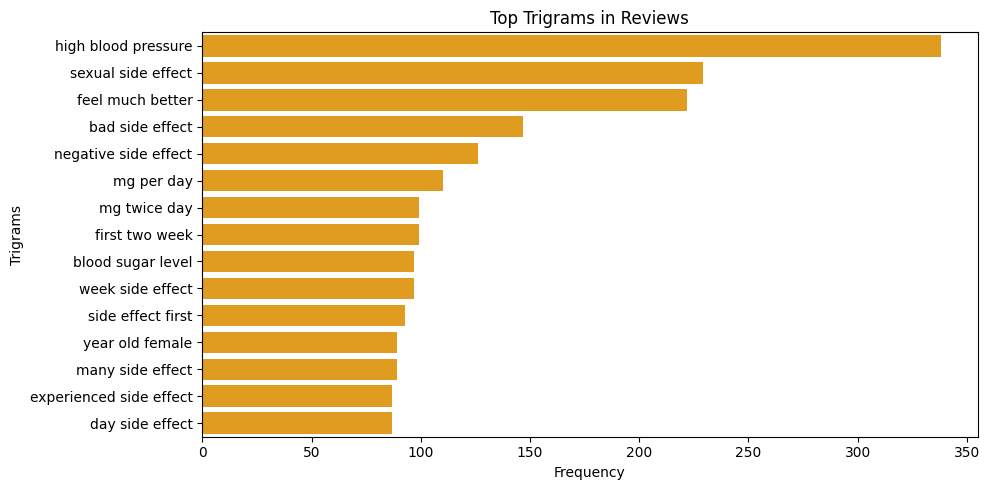

In [37]:
# Plot Top Trigrams
trigram_words = [' '.join(gram) for gram, count in top_trigrams]
trigram_counts = [count for gram, count in top_trigrams]

plt.figure(figsize=(10, 5))
sns.barplot(x=trigram_counts, y=trigram_words, color='orange')
plt.title("Top Trigrams in Reviews")
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.tight_layout()
plt.show()

In [38]:
data

,drugName,condition,review,rating,date,usefulCount,clean_review,review_length,Sentiment
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,2017-03-09,54,taken anti depressant year improvement mostly ...,43,positive
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,2011-05-07,3,week zoloft anxiety mood swing take mg morning...,28,positive
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,2016-04-27,3,gp started venlafaxine yesterday help depressi...,69,negative
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,2017-10-24,24,hey guy month since last post wanted give mont...,63,positive
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,2013-06-20,166,medicine saved life wit end anti depressant re...,51,positive
...,...,...,...,...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4,2009-07-15,39,fourth blood pressure pill feel like partly wo...,18,negative
13940,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1,2009-07-18,25,bystolic foot arm numb blood sugar became seve...,36,negative
13941,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9,2015-10-23,47,got diagnosed type doctor prescribed invokana ...,21,positive
13942,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,2016-07-17,33,third med tried anxiety mild depression week h...,19,negative


In [39]:
data['Sentiment'].nunique()

2

In [40]:
data['rating'].nunique()

10

In [41]:
data['Sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [42]:
# Convert categorical into numerical

data['Sentiment_encoded'] = data['Sentiment'].map({
    'negative': 0,
    'positive': 1
})


In [43]:
data

,drugName,condition,review,rating,date,usefulCount,clean_review,review_length,Sentiment,Sentiment_encoded
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,2017-03-09,54,taken anti depressant year improvement mostly ...,43,positive,1
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,2011-05-07,3,week zoloft anxiety mood swing take mg morning...,28,positive,1
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,2016-04-27,3,gp started venlafaxine yesterday help depressi...,69,negative,0
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,2017-10-24,24,hey guy month since last post wanted give mont...,63,positive,1
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,2013-06-20,166,medicine saved life wit end anti depressant re...,51,positive,1
...,...,...,...,...,...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4,2009-07-15,39,fourth blood pressure pill feel like partly wo...,18,negative,0
13940,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1,2009-07-18,25,bystolic foot arm numb blood sugar became seve...,36,negative,0
13941,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9,2015-10-23,47,got diagnosed type doctor prescribed invokana ...,21,positive,1
13942,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,2016-07-17,33,third med tried anxiety mild depression week h...,19,negative,0


In [44]:
data['drugName'].nunique()

334

In [45]:
# Word Cloud for all the reviews

In [46]:
!pip install wordcloud

In [47]:
from wordcloud import WordCloud

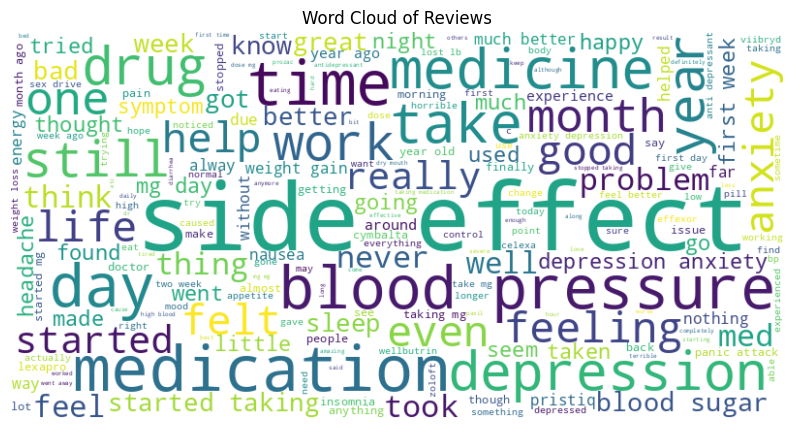

In [48]:
all_reviews = ' '.join(data['clean_review'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.show()

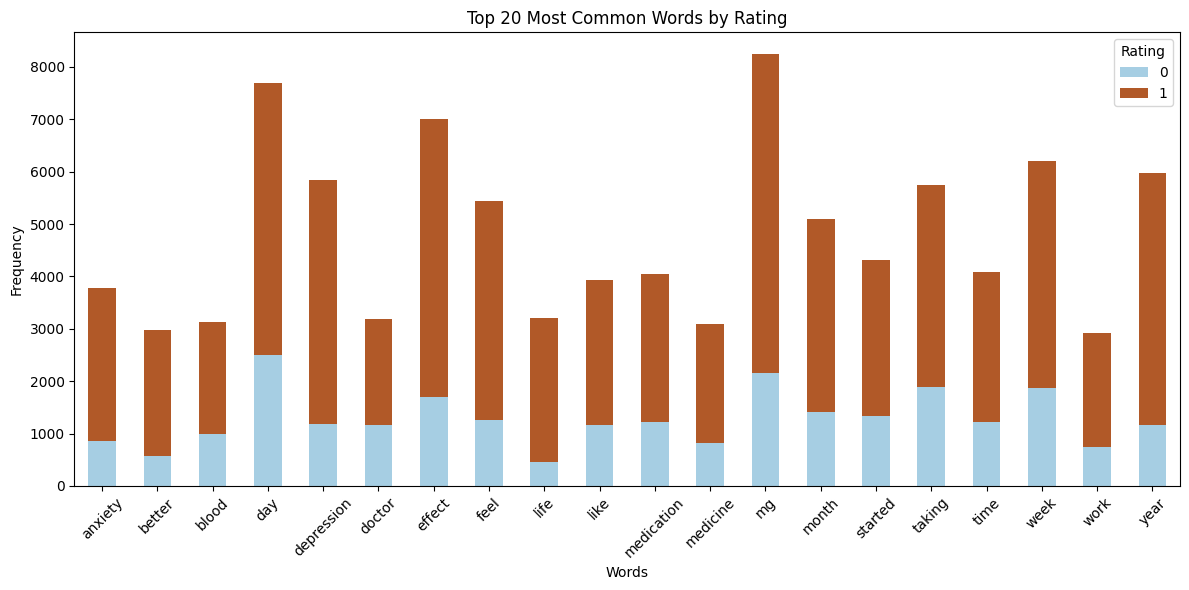

In [49]:
# CountVectorizer - most common words

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=20, stop_words='english')
X = vectorizer.fit_transform(data['clean_review'])

word_count = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_count['Sentiment_encoded'] = data['Sentiment_encoded']

grouped = word_count.groupby('Sentiment_encoded').sum()
grouped.T.plot(kind='bar', figsize=(12, 6), colormap='Paired', stacked=True)
plt.title("Top 20 Most Common Words by Rating")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.legend(title="Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
# TF-IDF Analysis

# Clean text data

from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return ' '.join([word for word in text.split() if word not in stopwords.words('english')])


# Configure the TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=1000,         # limit to top 1000 terms
    stop_words='english',      # remove common English words
    ngram_range=(1, 2),        # include unigrams and bigrams
    min_df=5,                  # ignore rare terms
    max_df=0.8                 # ignore overly common terms
)

# Fit and Transform

# Apply the vectorizer to your cleaned text:
X_tfidf = tfidf.fit_transform(data['clean_review'])

# Convert it to a DataFrame for inspection:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())


In [51]:
# Analyze by Group

# Group by label and take the mean:


tfidf_df['Sentiment'] = data['Sentiment_encoded']
mean_tfidf = tfidf_df.groupby('Sentiment').mean().T


/tmp/ipython-input-52-1085837640.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words[sentiment], y=top_words.index, palette='viridis')


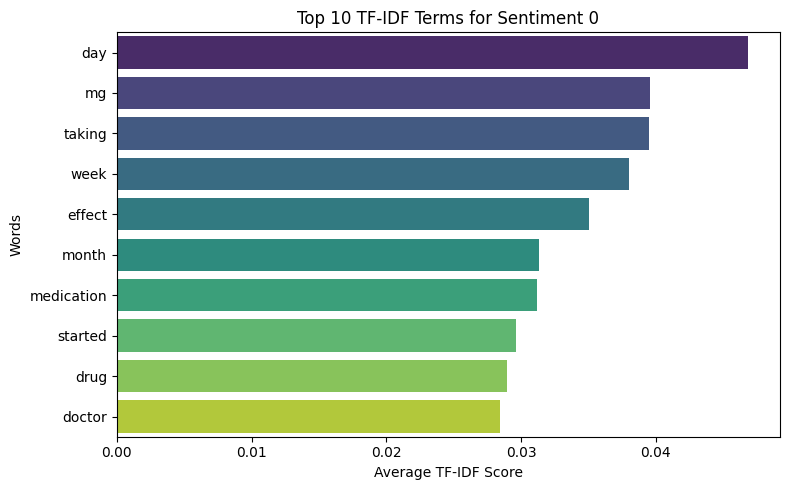

/tmp/ipython-input-52-1085837640.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words[sentiment], y=top_words.index, palette='viridis')


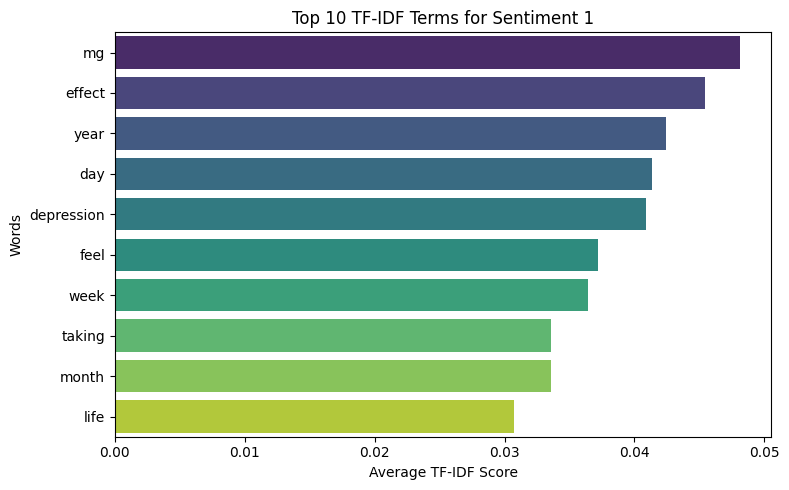

In [52]:
# Sort and visualize top TF-IDF terms per sentiment group

import matplotlib.pyplot as plt
import seaborn as sns

for sentiment in mean_tfidf.columns:
    top_words = mean_tfidf.sort_values(by=sentiment, ascending=False).head(10)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=top_words[sentiment], y=top_words.index, palette='viridis')
    plt.title(f"Top 10 TF-IDF Terms for Sentiment {sentiment}")
    plt.xlabel("Average TF-IDF Score")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()




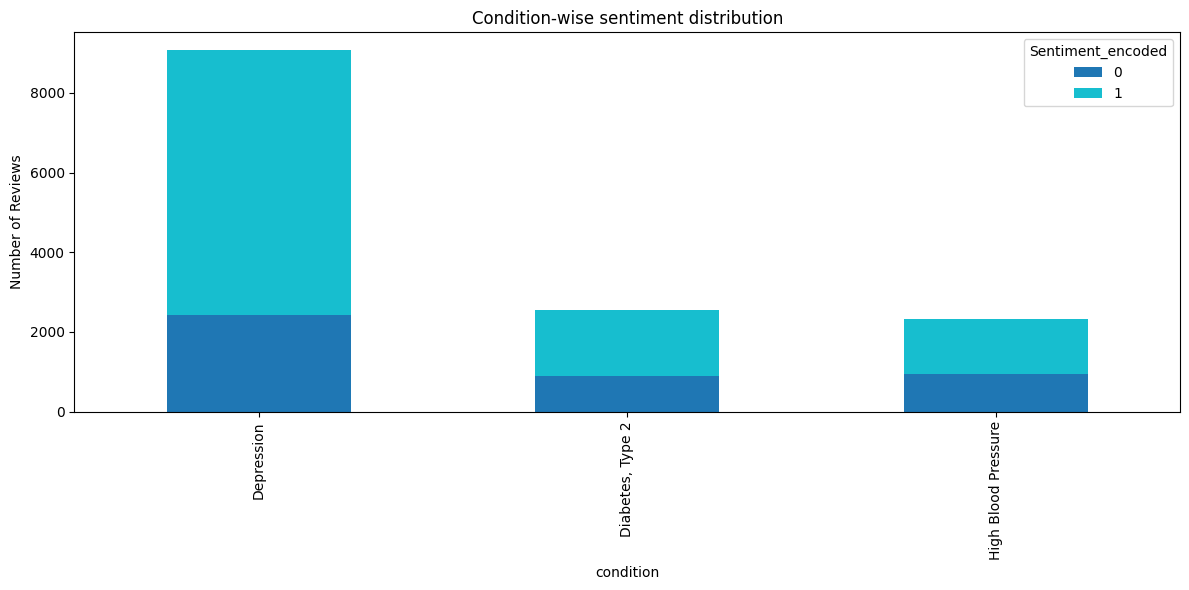

In [53]:
# Condition vs Sentiment

variation_feedback = data.groupby(['condition', 'Sentiment_encoded']).size().unstack().fillna(0)
variation_feedback.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Condition-wise sentiment distribution')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# The actual numbers on the y-axis (i.e. the counts of reviews) come from this part of your code:

# variation_feedback = data.groupby(['condition', 'Sentiment_encoded']).size()

# That .size() is counting how many rows fall into each (condition, sentiment) combo. And since every row in your dataset represents one
# review (with a corresponding clean_review text), counting the rows is equivalent to counting the reviews.

In [54]:
# Review cleaning

import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib

target_conditions = ["Depression", "High Blood Pressure", "Diabetes, Type 2"]
data = data[data["condition"].isin(target_conditions)].dropna(subset=["review"]).copy()

#Convert condition names into numeric labels: 0 = Depression, 1 = High BP, 2 = Diabetes.
label_map = {
    "Depression": 0,
    "High Blood Pressure": 1,
    "Diabetes, Type 2": 2
}
data["label"] = data["condition"].map(label_map)


#Clean the review text: remove HTML, punctuation, numbers, convert to lowercase, etc.
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"http\S+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\d+", "", text)
    return text.strip()

data["clean_review"] = data["review"].apply(clean_text)


In [55]:
data

,drugName,condition,review,rating,date,usefulCount,clean_review,review_length,Sentiment,Sentiment_encoded,label
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,2017-03-09,54,i have taken antidepressants for years with so...,43,positive,1,0
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,2011-05-07,3,week on zoloft for anxiety and mood swings i t...,28,positive,1,0
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,2016-04-27,3,my gp started me on venlafaxine yesterday to h...,69,negative,0,0
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,2017-10-24,24,hey guys its been months since my last post ...,63,positive,1,2
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,2013-06-20,166,this medicine saved my life i was at my wits e...,51,positive,1,0
...,...,...,...,...,...,...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4,2009-07-15,39,it is fourth blood pressure pill for me it fee...,18,negative,0,1
13940,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1,2009-07-18,25,while on bystolic my feet and arms were numb m...,36,negative,0,1
13941,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9,2015-10-23,47,i just got diagnosed with type my doctor pres...,21,positive,1,2
13942,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,2016-07-17,33,this is the third med ive tried for anxiety an...,19,negative,0,0


In [ ]:
# prompt: using pytorch create BERT model for the above codes



In [56]:
!pip install transformers

import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
import pandas as pd


In [57]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [58]:
class DrugDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        encoding = self.tokenizer.encode_plus(
            self.texts[item],
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[item], dtype=torch.long)
        }


In [59]:
# Split
X_train, X_val, y_train, y_val = train_test_split(data['clean_review'], data['label'], test_size=0.1, random_state=42)

# Create datasets
train_dataset = DrugDataset(X_train.tolist(), y_train.tolist(), tokenizer)
val_dataset = DrugDataset(X_val.tolist(), y_val.tolist(), tokenizer)


In [60]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [61]:
training_args = TrainingArguments(
    output_dir='./results',
    report_to="none",
    num_train_epochs=1,
    per_device_train_batch_size=50,
    per_device_eval_batch_size=50,
    eval_strategy='epoch',
    save_strategy='epoch',
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
)


In [62]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


In [63]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.146200,0.100257,0.965591,0.965084,0.965394,0.965591


TrainOutput(global_step=251, training_loss=0.31025414168834686, metrics={'train_runtime': 14618.2707, 'train_samples_per_second': 0.858, 'train_steps_per_second': 0.017, 'total_flos': 825452569767168.0, 'train_loss': 0.31025414168834686, 'epoch': 1.0})

In [64]:
trainer.evaluate()


{'eval_loss': 0.10025708377361298,
 'eval_accuracy': 0.9655913978494624,
 'eval_f1': 0.9650836363253307,
 'eval_precision': 0.9653938371385905,
 'eval_recall': 0.9655913978494624,
 'eval_runtime': 532.5812,
 'eval_samples_per_second': 2.619,
 'eval_steps_per_second': 0.053,
 'epoch': 1.0}

In [65]:
def predict_condition(text):
    inputs = tokenizer.encode_plus(
        text,
        return_tensors="pt",
        add_special_tokens=True,
        max_length=128,
        truncation=True,
        padding="max_length"
    )
    outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits, dim=1).item()
    return predicted_class  # or map back to label_map if you have one

In [67]:
predict_condition("This medicine saved my life. I was at my wits end with anti-depressants and was ready to give up. My doctor finally prescribed me this after many failed medications, I am so glad she did. I honestly do not know where I would be without Effexor XR. Side effects were very mild compared to other anti-depressants I tried. I was drowsy for the first couple days, but it was tolerable. I highly recommend this for severe depression. I would also like to mention for people to realize there is light at the end of the tunnel and YOU WILL GET BETTER, and to never give up")

0

In [68]:
# ROC graph
#  1. Get Probabilities for Validation Set

import numpy as np

# Get raw model predictions
predictions = trainer.predict(val_dataset)
probs = torch.nn.functional.softmax(torch.tensor(predictions.predictions), dim=1).numpy()
y_true = predictions.label_ids


In [69]:
# 2. Binarize the Output for Multi-class ROC

from sklearn.preprocessing import label_binarize

# Binarize true labels
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
n_classes = y_true_bin.shape[1]


In [70]:
# 3. Compute ROC Curve and AUC for Each Class

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


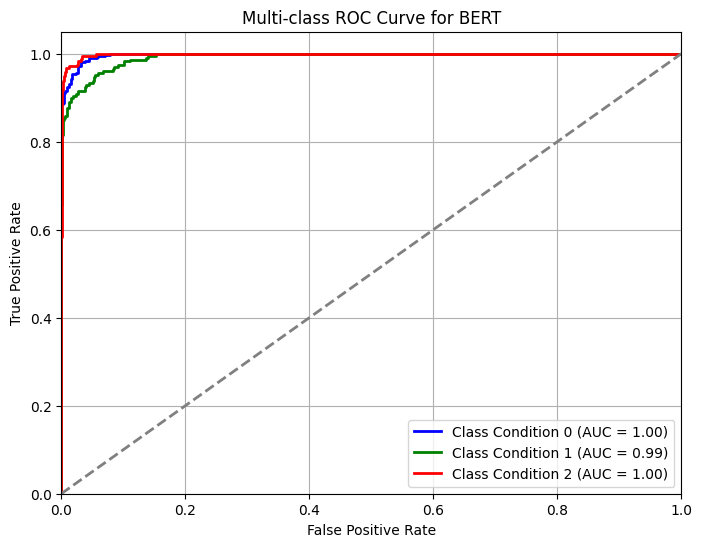

In [71]:
# 4. Plot ROC Curve

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
labels = ['Condition 0', 'Condition 1', 'Condition 2']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Class {labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve for BERT')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [72]:
# Generate a Classification Report

# 1. Import the Function

from sklearn.metrics import classification_report


In [73]:
# 2. Get Predicted Labels

y_pred = predictions.predictions.argmax(-1)  # predicted class indices
y_true = predictions.label_ids               # ground truth labels


In [74]:
# 3. Generate the Report

target_names = ['Condition 0', 'Condition 1', 'Condition 2']  # update as needed
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

 Condition 0       0.97      0.99      0.98       926
 Condition 1       0.95      0.88      0.91       227
 Condition 2       0.97      0.94      0.96       242

    accuracy                           0.97      1395
   macro avg       0.96      0.94      0.95      1395
weighted avg       0.97      0.97      0.97      1395

